# Image Classification

In [1]:
# import libraries
import pandas as pd
import os

#load datasets if already saved
path = './data/COVID-19_Radiography_Dataset/'
train_data = pd.read_csv(path + "train_data.csv")
val_data = pd.read_csv(path + "val_data.csv")
test_data = pd.read_csv(path + "test_data.csv")

# 1. Import the dataset

In [6]:
import zipfile

# unzip to a local directory
local_zip = './archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [8]:
# remove the previous zipped folder (optional)
!rm archive.zip

In [25]:
import pandas as pd
import csv
import os

levels = ['Normal', 'COVID', 'Viral Pneumonia']
path = "data/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level + '/images')):
        data.append([level, '{}/{}/images/{}'.format(path, level, file)])

data = pd.DataFrame(data, columns = ['class', 'image'])


print(data.shape)
data.head()

(15153, 2)


,class,image
0,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
1,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
2,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
3,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
4,Normal,data/COVID-19_Radiography_Dataset/Normal/image...


In [26]:
#save the dataframe
path_df = 'data/COVID-19_Radiography_Dataset/dataframe.csv'
data.to_csv(path_df, index=False, header=True)

# 2. Vizualize & explore the dataset

Processing class: Normal
Processing class: COVID
Processing class: Viral Pneumonia


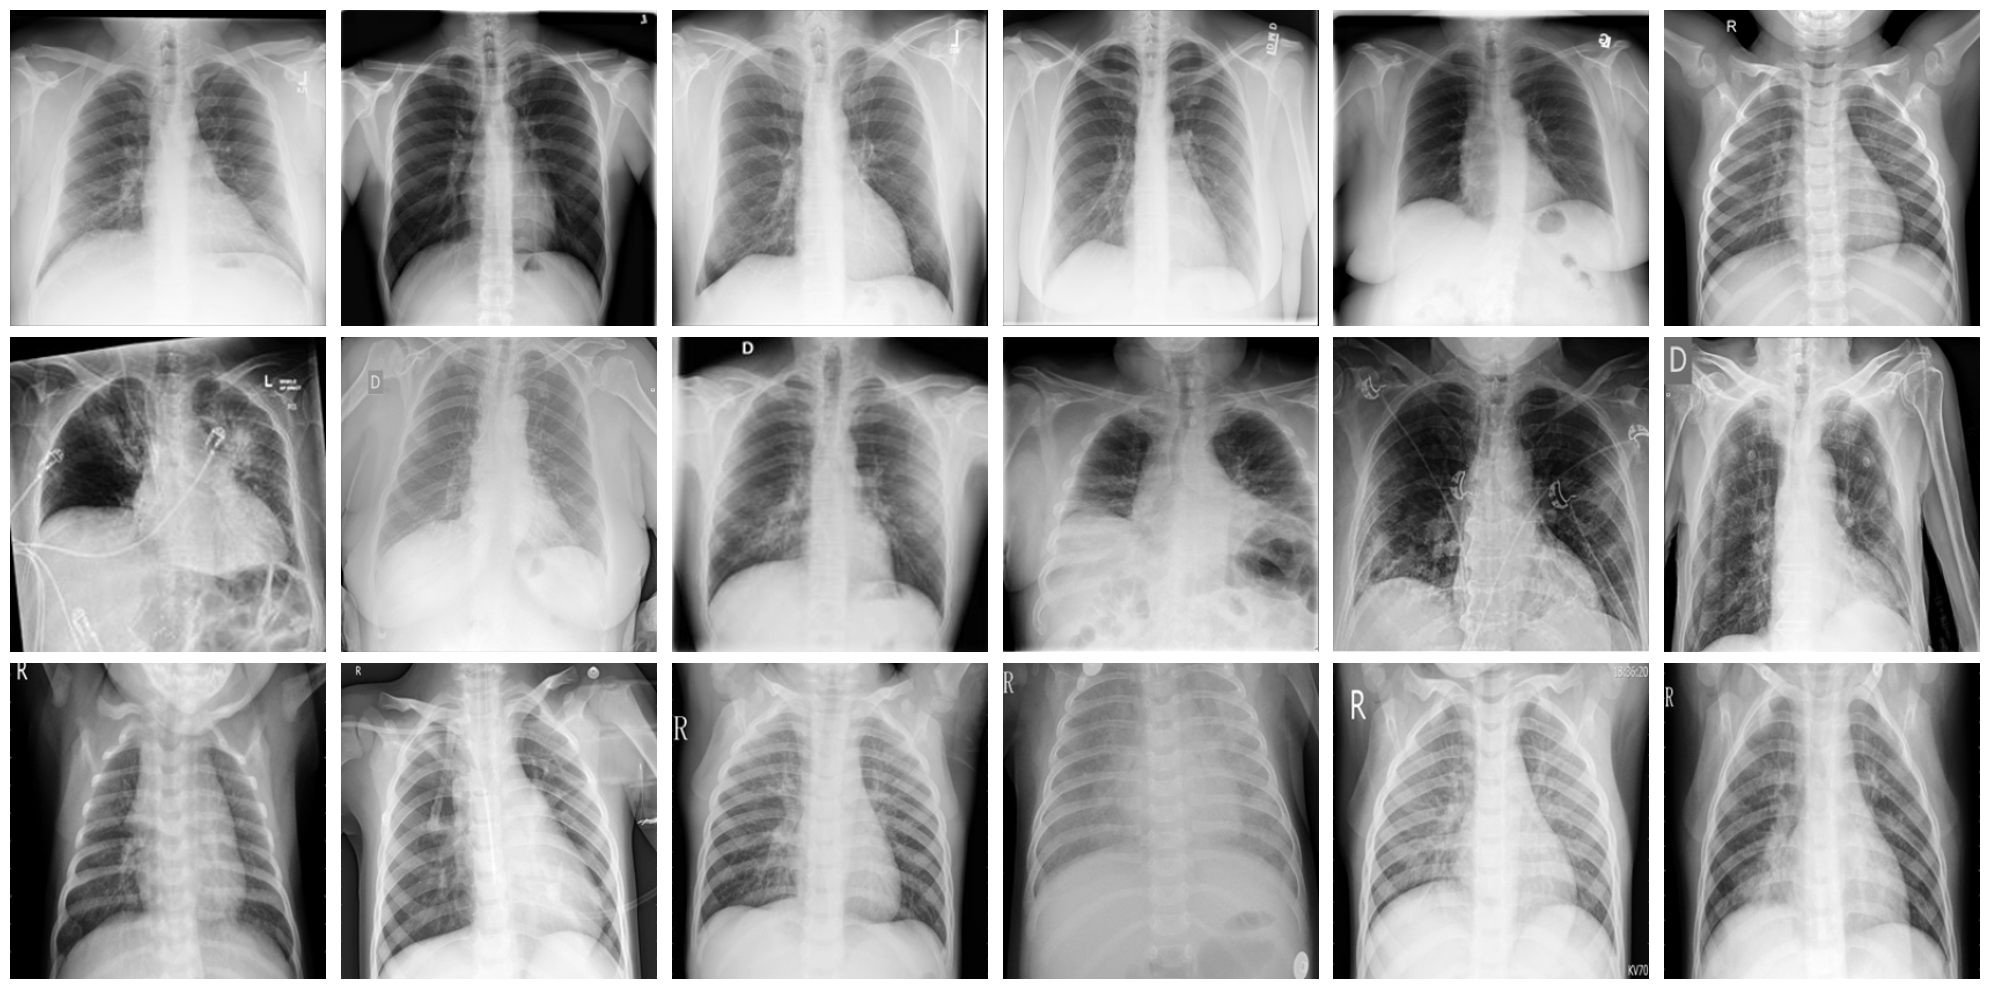

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random

# configure plot settings via rcParams
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

# Function to randomly select and display 6 images per class.
def display_random_images(data, n_per_class=6):
    # Retrieve unique class names from the DataFrame.
    classes = data['class'].unique()

    # Create a subplot grid: one row for each class, and n_per_class columns.
    fig, axs = plt.subplots(len(classes), n_per_class, figsize=(20, 10))

    # Loop over each class to display images.
    for i, class_name in enumerate(classes):
        print(f"Processing class: {class_name}")  # Print the current class being processed.

        # Filter the DataFrame to only include rows of the current class.
        class_data = data[data['class'] == class_name]

        # Randomly select n_per_class images from the class.
        random_images = class_data.sample(n=n_per_class)

        # Loop over the selected images and display each one.
        for j, (_, row) in enumerate(random_images.iterrows()):
            # Get the image file path from the DataFrame.
            img_path = row['image']

            # Read and display the image using matplotlib.
            img = plt.imread(img_path)
            axs[i, j].imshow(img, cmap='gray')  # Display image in grayscale.
            axs[i, j].axis('off')  # Turn off axis labels.

            # Set the class name as the label for the first image in each row.
            if j == 0:
                axs[i, j].set_ylabel(class_name)

    # Adjust the layout so that images do not overlap with each other.
    plt.tight_layout()
    plt.show()

# Execute the function to display the images.
display_random_images(data)


In [33]:
!pip install -q seaborn

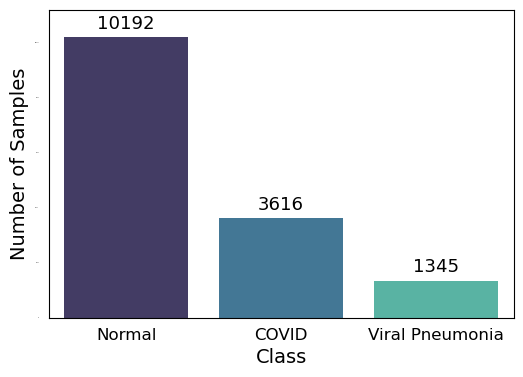

In [42]:
import seaborn as sns
plt.figure(figsize=(6,4))

# Creating a count plot with Seaborn.
ax = sns.countplot(x='class', hue='class', data=data, palette="mako", legend=False)

# Setting labels and their font sizes.
plt.xlabel("Class", fontsize= 14)
plt.ylabel("Number of Samples", fontsize= 14)

# Setting the y-axis limit. 
plt.ylim(0, max(data['class'].value_counts()) + 1000)

# Setting the x-ticks labels to match the classes in your dataset.
plt.xticks(fontsize=12)

# Annotating the bars with the count of samples in each class.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # No decimal places in annotation.
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the annotation.
                ha = 'center', va = 'center', 
                xytext = (0, 10),  # Distance from the top of the bar.
                textcoords = 'offset points',
                fontsize=13)

plt.show()


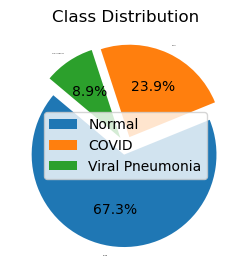

In [54]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a 'class' column
class_counts = data['class'].value_counts()

# Setting the explode parameter for each class to slightly separate the slices
explode = (0.1, 0.1, 0.1)  # Adjust these values as needed

# Creating the pie chart
plt.figure(figsize=(4, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Class Distribution')
plt.legend(labels=['Normal', 'COVID', 'Viral Pneumonia'])

# Show the pie chart
plt.show()


The pie chart illustrates the class distribution within the dataset, highlighting the imbalance among different categories. The disparity in the number of samples for each class suggests potential biases in the dataset, which could affect analytical outcomes or model predictions. Addressing this imbalance, either through data augmentation for underrepresented classes or by applying specific analytical techniques (e.g. undersampling or oversampling), is crucial for ensuring balanced representation and accurate insights.

# 3. Prepare data

In [61]:
from sklearn.model_selection import train_test_split


# Step 1: Split Data into Train and Test Sets (80-20 Split)
# The stratify parameter ensures the train and test sets have the same proportion of class labels as the original dataset.
# random_state is set to a fixed number to ensure reproducibility of the split.
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['class'], random_state=42)

# Step 2: Split Train Data into Train and Validation Sets (90-10 Split)
# Again, using stratify to maintain class distribution in the splits.
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data['class'], random_state=42)

# Step 3: Save the Datasets to CSV Files
# This creates CSV files in the current working directory.
# index=False is used to indicate that we don't want to save the row indices.
path_dir = 'data/COVID-19_Radiography_Dataset/'
train_data.to_csv(path_dir +'train_data.csv', index=False)
test_data.to_csv(path_dir+ 'test_data.csv', index=False)
val_data.to_csv(path_dir+'val_data.csv', index=False)

# Print a message to indicate successful completion.
print(f'Training set shape: {train_data.shape}')
print(f'Val set shape: {val_data.shape}')
print(f'Test set shape: {test_data.shape}')
print("Datasets successfully split and saved as CSV files.")


Training set shape: (10909, 2)
Val set shape: (1213, 2)
Test set shape: (3031, 2)
Datasets successfully split and saved as CSV files.


This code is used for preparing image datasets for a deep learning model in Keras. The ImageDataGenerator is utilized for data preprocessing and augmentation:

1) Data preprocessing (or Rescaling): normalization (rescaling pixel values).
2) Data augmentation: random zooming, and random horizontal and vertical shifts are applied to augment the data, which helps in reducing overfitting and improves model generalization. It doesn't physically create more images, but dynamically modifies the images with each training epoch. So, theoretically, it can generate an infinite number of image variations, but in practice, each training batch will have variations of the original images.

The `flow_from_dataframe` method creates data generators that automatically fetch images and labels from the specified DataFrame, handling the loading and preprocessing of images. The training data generator uses random transformations (seeded for reproducibility), while the test data generator processes images in order without shuffling. The test & validation sets are not augmented, only rescaled.

For the data augmentation, i choosed to:

Randomly rotate some training images by 30 degrees
Randomly Zoom by 20% some training images
Randomly shift images horizontally by 10% of the width
Randomly shift images vertically by 10% of the height
Randomly flip images horizontally. Once our model is ready, we fit the training dataset.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224  # Image size (150x150 pixels in this example)
BATCH = 32      # Batch size for processing in batches
SEED = 42       # Seed for reproducibility of results

# ImageDataGenerator for Training Data
# Includes data augmentation to improve model generalization
train_datagen = ImageDataGenerator(
    rescale=1/255.,          # Normalizing pixels (0-1 range)
    zoom_range=0.15,          # Random zoom up to 15%
    width_shift_range=0.15,   # Horizontal shift up to 15%
    height_shift_range=0.15,  # Vertical shift up to 15%
)

# ImageDataGenerator for Validation and Test Data
# Only normalization is applied here
val_datagen = ImageDataGenerator(rescale=1/255.) #specify the images are 1 channel)


# Flow from DataFrame for Training Data
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    y_col='class',
    color_mode='grayscale', #specify the images are 1 channel
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=BATCH,                  # Number of images to process at a time
    seed=SEED                           # Seed for random transformations
)

# Flow from DataFrame for Validation Data
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image',
    y_col='class',
    color_mode='grayscale', #specify the images are 1 channel
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=BATCH,
    seed=SEED
)

# Flow from DataFrame for Test Data
ds_test = val_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    y_col='class',
    color_mode='grayscale', #specify the images are 1 channel
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=1,                      # Processing one image at a time
    shuffle=False                      # Keeping the order of images
)


Found 10909 validated image filenames belonging to 3 classes.
Found 1213 validated image filenames belonging to 3 classes.
Found 3031 validated image filenames belonging to 3 classes.


# 4. Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model

In [9]:
import tensorflow as tf

# Check for GPU availability
if tf.test.gpu_device_name():
    print("GPU is available")
    # Additional GPU-related information can be obtained here
    print("GPU Device Name: {}".format(tf.test.gpu_device_name()))
else:
    print("GPU is not available")


GPU is available
GPU Device Name: /device:GPU:0


## 4.1 Model 1: Standard CNN

In [10]:
# Setting callbacks

# EarlyStopping: Monitor validation loss and stop training if it doesn't improve for a certain number of epochs.
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement before stopping
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    restore_best_weights=True,  # Restore model weights to the best epoch
)

# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus.
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    cooldown=0,  # Number of epochs to wait before resuming normal operation after lr has been reduced
    verbose=1,  # Verbosity mode (1 for updates, 0 for silent)
)


In [11]:
# Define a function to create a Keras model for image classification.

def get_model(nb_channels):
    nb_channels = nb_channels #1=Grey-scale   #3=RGB or HSV

    # Input shape: [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, nb_channels))  # Input layer for grayscale images (single channel).

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)  
    # Convolutional layer with 16 filters and 3x3 kernel, valid = no padding (starts at first pixel).
    x = layers.BatchNormalization()(x)  # Batch normalization to stabilize training.
    x = layers.Activation('relu')(x)  # ReLU activation function for non-linearity.
    x = layers.MaxPool2D()(x)  # Max-pooling for down-sampling.
    x = layers.Dropout(0.2)(x)  # Dropout layer for regularization.

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)  # Another convolutional layer.
    x = layers.BatchNormalization()(x)  # Batch normalization.
    x = layers.Activation('relu')(x)  # ReLU activation.
    x = layers.MaxPool2D()(x)  # Max-pooling.
    x = layers.Dropout(0.2)(x)  # Dropout.

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)  # Yet another convolutional layer.
    # x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)  # One more convolutional layer.
    x = layers.BatchNormalization()(x)  # Batch normalization.
    x = layers.Activation('relu')(x)  # ReLU activation.
    x = layers.MaxPool2D()(x)  # Max-pooling.
    x = layers.Dropout(0.2)(x)  # Dropout.

    # Head
    x = layers.Flatten()(x)  # Flatten the output for the fully connected layers.
    x = layers.Dense(64, activation='relu')(x)  # Fully connected layer with ReLU activation.
    x = layers.Dropout(0.4)(x)  # Dropout for regularization.

    # Final Layer (Output)
    output = layers.Dense(3, activation='softmax')(x)  # Output layer for multi classification.

    model = keras.Model(inputs=[inputs], outputs=output)  # Create the Keras model.

    return model  # Return the model.


In [12]:
keras.backend.clear_session()

model = get_model(nb_channels = 1)
model.compile(loss='categorical_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics='accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [ ]:
# train
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_data)/BATCH),
          validation_steps=(len(val_data)/BATCH));


In [14]:
!pip install -q seaborn

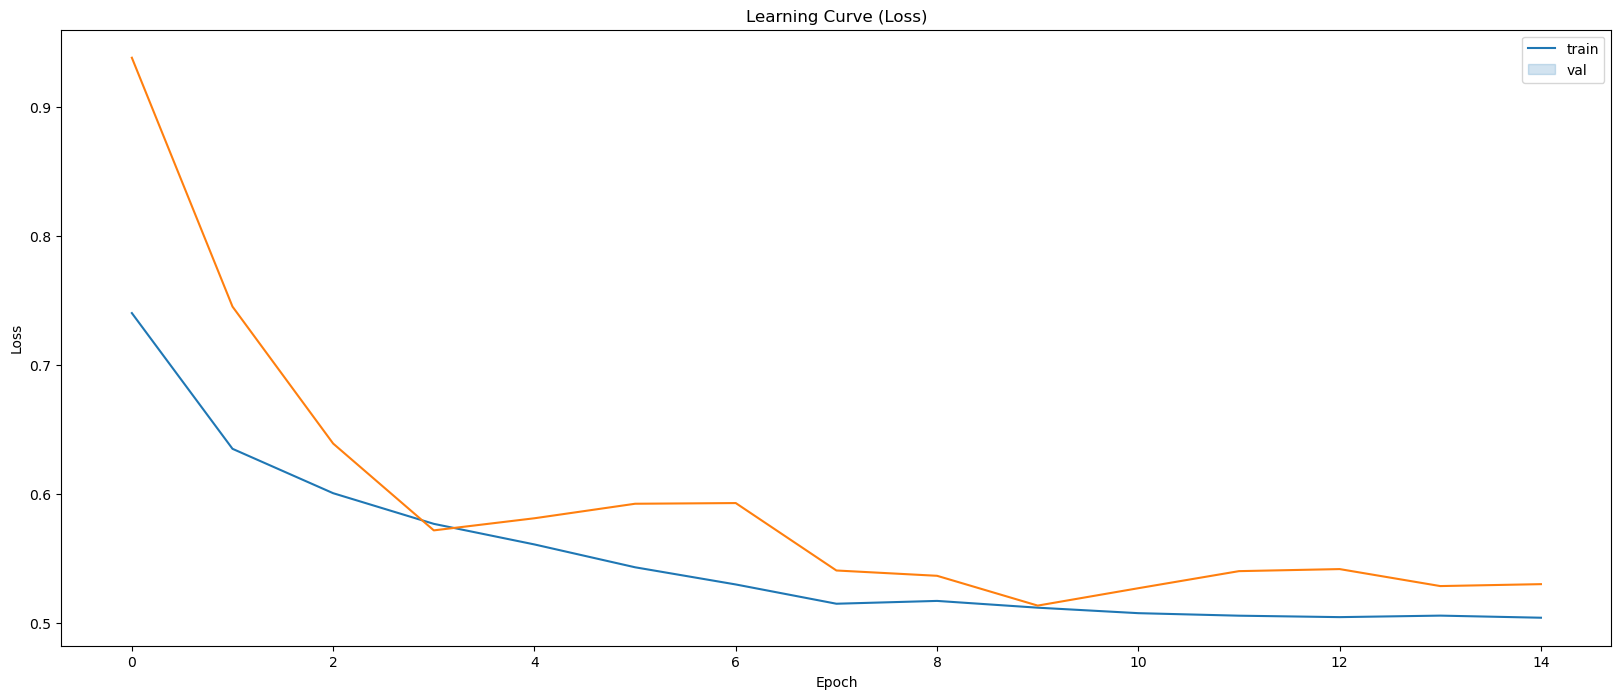

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
# ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

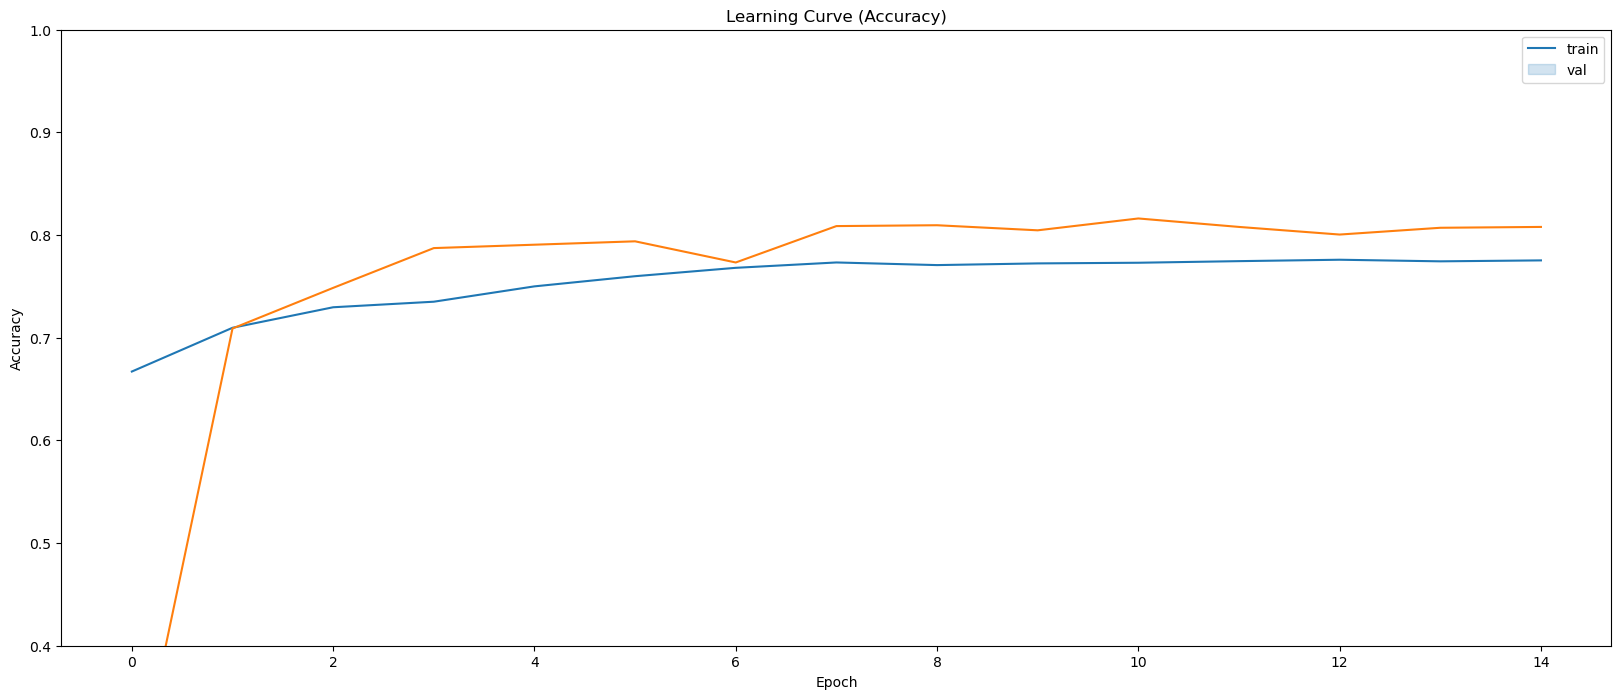

In [19]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.40, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

Saliency maps highlight the regions in an image that are most influential for the model’s prediction. Brighter areas in these maps indicate parts of the image where changes would most affect the model's output.

For Classification Tasks: If the model correctly classifies an image, the saliency map should highlight the features that are characteristic of the class. For example, in a model trained to identify animals, the saliency map for a 'dog' image should highlight areas showing the dog, especially distinguishing features like ears or nose.


1/1 [==============================] - 0s 17ms/step


/tmp/ipykernel_92/3126335642.py:85: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


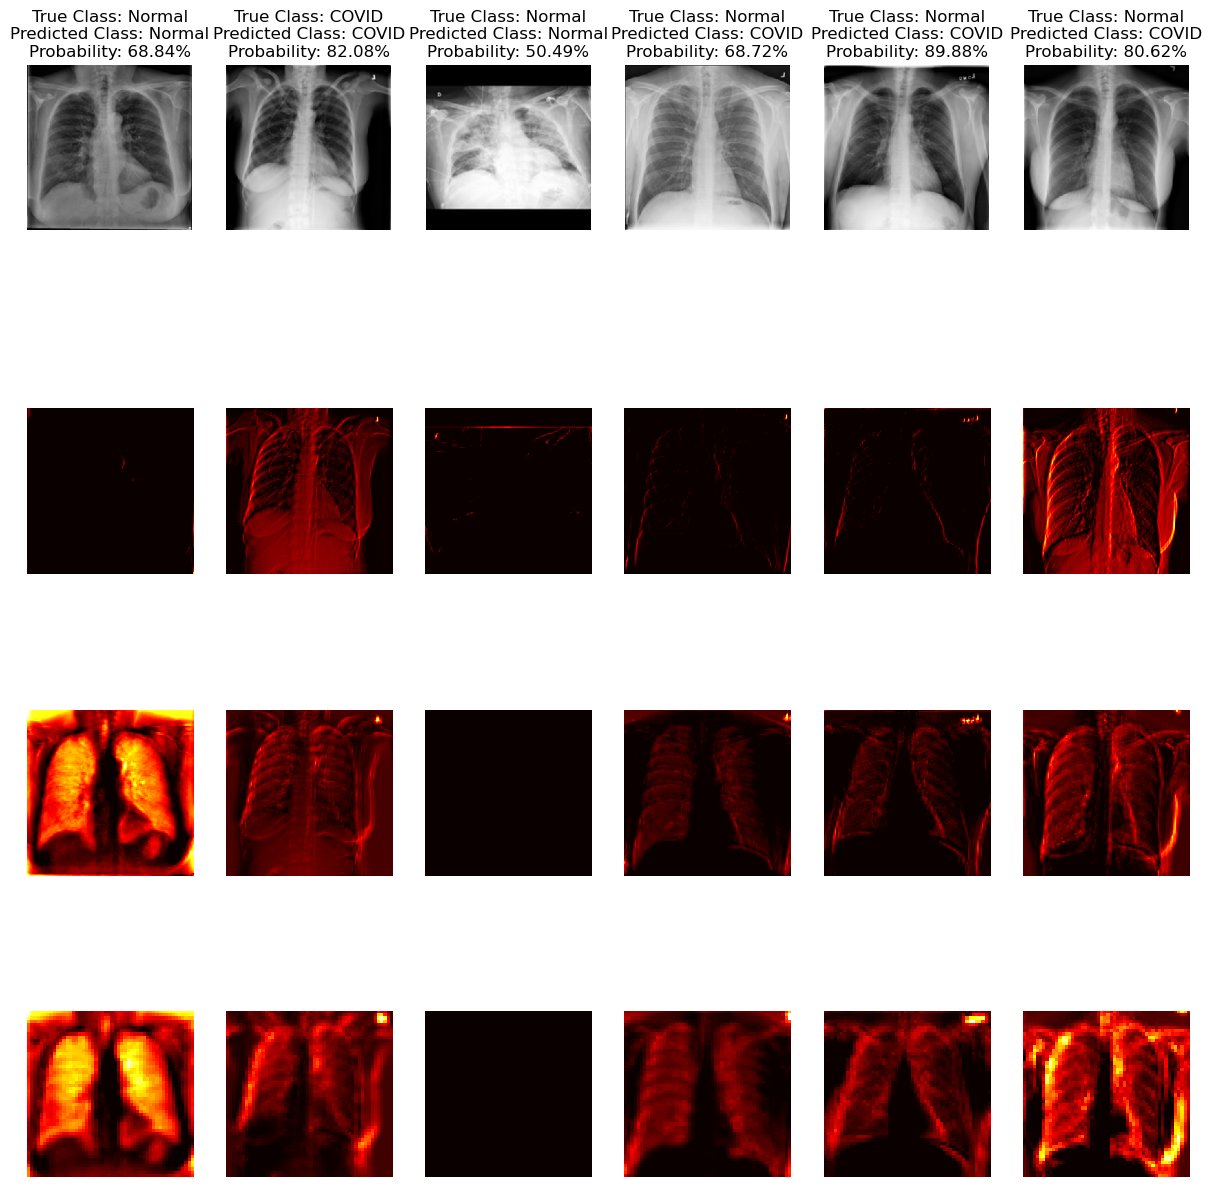

In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model


class_labels = train_data.iloc[:, 0].tolist()  # Class labels
img_paths = train_data.iloc[:, 1].tolist()  # Adjust the column index if needed
# selected_img_paths = random.sample(img_paths, 6)  # Randomly pick 4 images
selected_indices = random.sample(range(len(img_paths)), 6)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_classes = [class_labels[i] for i in selected_indices]

# Function to preprocess your image (modify as per your model's requirement)
def preprocess_image(img_path, IMG_SIZE=IMG_SIZE):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.  # Normalization (adjust if your preprocessing is different)
    return img

# Function to generate saliency map for a specific layer
def get_saliency_map(model, image, layer_name):
    # Creating a model that will return the output of the specified layer as well as the final model output
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])

    # Using GradientTape for automatic differentiation.
    # This will record operations for computing gradients with respect to the inputs (image).
    with tf.GradientTape() as tape:
        # Running forward pass. Watching the input image for gradient calculation.
        conv_outputs, predictions = grad_model(image)

        # Using the class with the highest probability as our target class.
        # Alternatively, you can modify this to focus on a specific class.
        loss = tf.reduce_max(predictions)

    # Computing the gradients of our target (loss) with respect to the output of the specified layer
    grads = tape.gradient(loss, conv_outputs)

    # Global average pooling of the gradients to get a vector
    # This gives the importance of each feature map in the convolutional layer.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Accessing the output of the specified layer for our input image
    conv_outputs = conv_outputs[0]

    # Weighing the output feature maps by the pooled gradients
    # This step highlights the feature maps that are most influential for the target class.
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalizing the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# List of layer names for which you want to visualize the saliency maps
layer_names = ["conv2d", "conv2d_1", "conv2d_2"]  # Replace with your actual layer names

# Visualizing the saliency maps for the selected images and layers
plt.figure(figsize=(15, 15))
for i, (img_path, img_class) in enumerate(zip(selected_img_paths, selected_classes)):
    img = preprocess_image(img_path)
    
    # Predicting the class of the image using the model
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class_probability = predictions[0][predicted_class_index]
    predicted_class = class_labels[predicted_class_index]
    
    # Displaying the class and original image
    plt.subplot(6, len(selected_img_paths), i + 1)
    plt.title(f"True Class: {class_labels[i]}\nPredicted Class: {predicted_class}\nProbability: {predicted_class_probability:.2%}")
    # plt.title(f"Class: {img_class}")
    plt.imshow(load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE)))
    plt.axis('off')

    # Displaying saliency maps for each layer
    for j, layer_name in enumerate(layer_names):
        saliency_map = get_saliency_map(model, img, layer_name)
        plt.subplot(4, len(selected_img_paths), len(selected_img_paths) * (j + 1) + i + 1)
        plt.imshow(saliency_map, cmap='hot')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [24]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the predicted labels from your model
y_pred = model.predict(ds_test)

# Transform the predicted labels into classes (class indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the data generator
y_true = ds_test.classes

# Get the class names from the data generator
class_names = list(ds_test.class_indices.keys())

# Calculate the overall accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion)

# Calculate per-class accuracy
class_accuracy = confusion.diagonal() / confusion.sum(axis=1)
print("Accuracy per class:")
for i, acc in enumerate(class_accuracy):
    print(f"Class {class_names[i]}: {acc:.2f}")

# Calculate the classification report (including per-class F1-score)
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


3031/3031 [==============================] - 9s 3ms/step
Accuracy: 0.814252721873969
Confusion Matrix:
[[ 425  250   48]
 [ 156 1789   94]
 [   8    7  254]]
Accuracy per class:
Class COVID: 0.59
Class Normal: 0.88
Class Viral Pneumonia: 0.94
Classification Report:
                 precision    recall  f1-score   support

          COVID       0.72      0.59      0.65       723
         Normal       0.87      0.88      0.88      2039
Viral Pneumonia       0.64      0.94      0.76       269

       accuracy                           0.81      3031
      macro avg       0.75      0.80      0.76      3031
   weighted avg       0.82      0.81      0.81      3031



# 5 ResNet Pre-trained on ImageNet (freezed - for binary classification)

In [83]:
train_data

,class,image
0,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
1,COVID,data/COVID-19_Radiography_Dataset/COVID/images...
2,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
3,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
4,Normal,data/COVID-19_Radiography_Dataset/Normal/image...
...,...,...
10904,COVID,data/COVID-19_Radiography_Dataset/COVID/images...
10905,COVID,data/COVID-19_Radiography_Dataset/COVID/images...
10906,Viral Pneumonia,data/COVID-19_Radiography_Dataset/Viral Pneumo...
10907,Normal,data/COVID-19_Radiography_Dataset/Normal/image...


In [84]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224  # Image size (150x150 pixels in this example)
BATCH = 32      # Batch size for processing in batches
SEED = 42       # Seed for reproducibility of results

# ImageDataGenerator for Training Data
# Includes data augmentation to improve model generalization
train_datagen = ImageDataGenerator(
    rescale=1/255.,          # Normalizing pixels (0-1 range)
    zoom_range=0.15,          # Random zoom up to 15%
    width_shift_range=0.15,   # Horizontal shift up to 15%
    height_shift_range=0.15,  # Vertical shift up to 15%
)

# ImageDataGenerator for Validation and Test Data
# Only normalization is applied here
val_datagen = ImageDataGenerator(rescale=1/255.) #specify the images are 1 channel)


# Flow from DataFrame for Training Data
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_data.replace(['Viral Pneumonia', 'Normal'], 'No COVID'),
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='binary',  # 'categorical' for multi-class dataset
    batch_size=BATCH,                  # Number of images to process at a time
    seed=SEED                           # Seed for random transformations
)

# Flow from DataFrame for Validation Data
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_data.replace(['Viral Pneumonia', 'Normal'], 'No COVID'),
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',  # 'categorical' for multi-class dataset
    batch_size=BATCH,
    seed=SEED
)

# Flow from DataFrame for Test Data
ds_test = val_datagen.flow_from_dataframe(
    dataframe=test_data.replace(['Viral Pneumonia', 'Normal'], 'No COVID'),
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='binary',  # 'categorical' for multi-class dataset
    batch_size=1,                      # Processing one image at a time
    shuffle=False                      # Keeping the order of images
)


Found 10909 validated image filenames belonging to 2 classes.
Found 1213 validated image filenames belonging to 2 classes.
Found 3031 validated image filenames belonging to 2 classes.


ResNet50 Architecture (50 layers)


![ResNet](https://upload.wikimedia.org/wikipedia/commons/9/98/ResNet50.png)

In [85]:
# Setting callbacks

# EarlyStopping: Monitor validation loss and stop training if it doesn't improve for a certain number of epochs.
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement before stopping
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    restore_best_weights=True,  # Restore model weights to the best epoch
)

# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus.
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    cooldown=0,  # Number of epochs to wait before resuming normal operation after lr has been reduced
    verbose=1,  # Verbosity mode (1 for updates, 0 for silent)
)


In [93]:
# Define a function to create a Keras model for image classification.
from tensorflow.keras.applications import ResNet50

#NB: make your model work with grayscale images. You just need to make the image to appear to be RGB. 
# The easiest way to do so is to repeat the image array 3 times on a new dimension. 
# Because you will have the same image over all 3 channels, the performance of the model should be the same
# as it was on RGB images.

# Load the pre-trained ResNet50 model, pretrained on 'imagenet'
# Set the input shape to (IMG_SIZE, IMG_SIZE, 1) and exclude the top layer
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),  # Specify the input shape (width, height, color channels)
    include_top=False
)

# Set the base model to be non-trainable (freeze its weights)
base_model.trainable = False

def get_pretrained():
    # Define the input layer with the desired shape
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))  # Input shape: (width, height, color channels)

    # Pass the input through the pre-trained base model
    x = base_model(inputs)
    
    # Head
    
    # x = layers.GlobalAveragePooling2D()(x) # Global Average Pooling Layer
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x) # Fully connected layer with 128 units and ReLU activation
    x = layers.Dropout(0.2)(x) # Dropout layer with a dropout rate of 0.1 to prevent overfitting
    output = layers.Dense(1, activation='sigmoid')(x) # Final output layer with 3 unit and softmax activation for multi classification

    # Create the final model with specified input and output
    model = keras.Model(inputs=[inputs], outputs=output)

    return model


In [103]:
keras.backend.clear_session()
# from tensorflow.keras.metrics import F1Score
import tensorflow 
model = get_pretrained()

# Créer une instance de la métrique F1-score pour deux classes (binary)
# f1_score = tensorflow.keras.metrics.F1Score(num_classes=2, average='binary')

model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 30,010,369
Trainable params: 6,422,657
Non-trai

In [ ]:
# train
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_data)/BATCH),
          validation_steps=(len(val_data)/BATCH));


In [12]:
!pip install -q seaborn

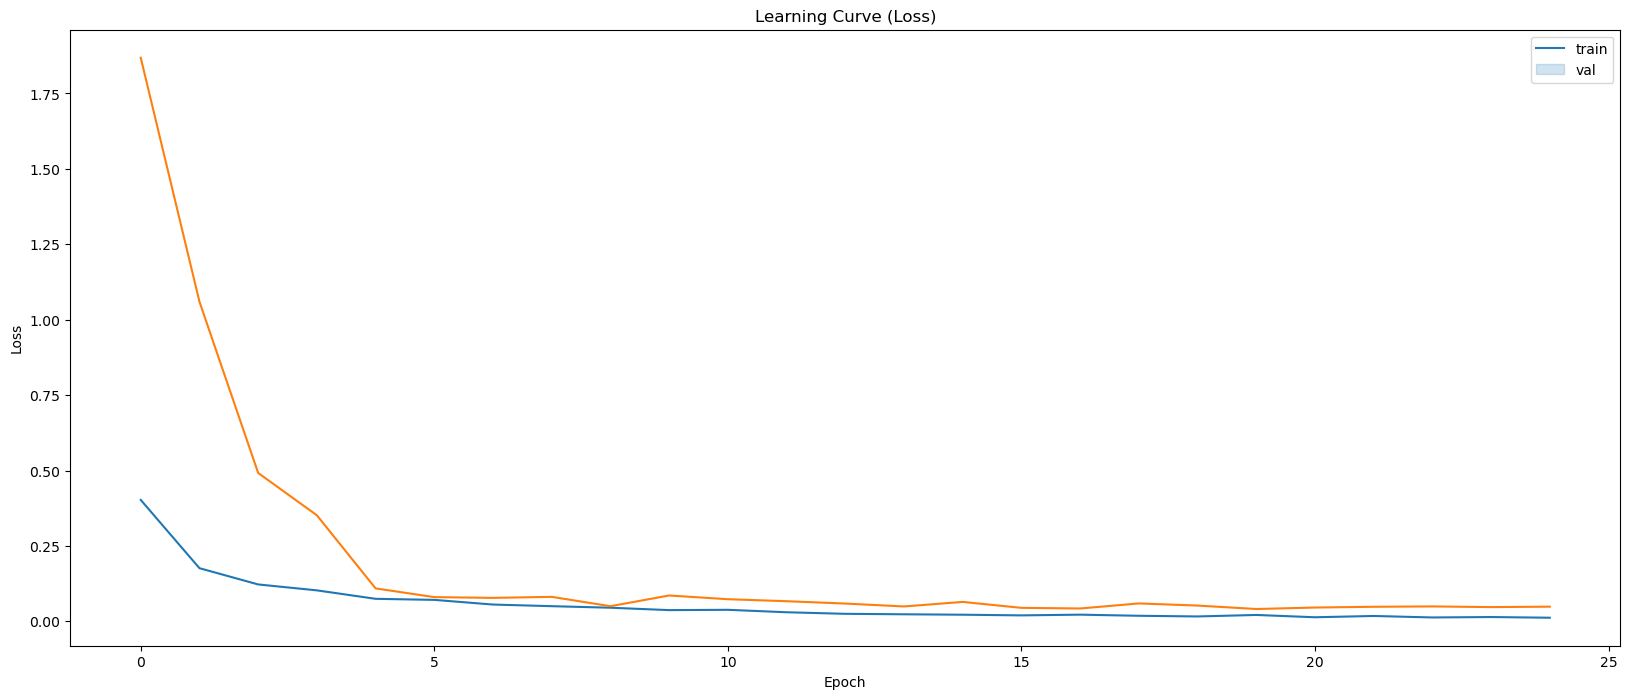

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
# ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

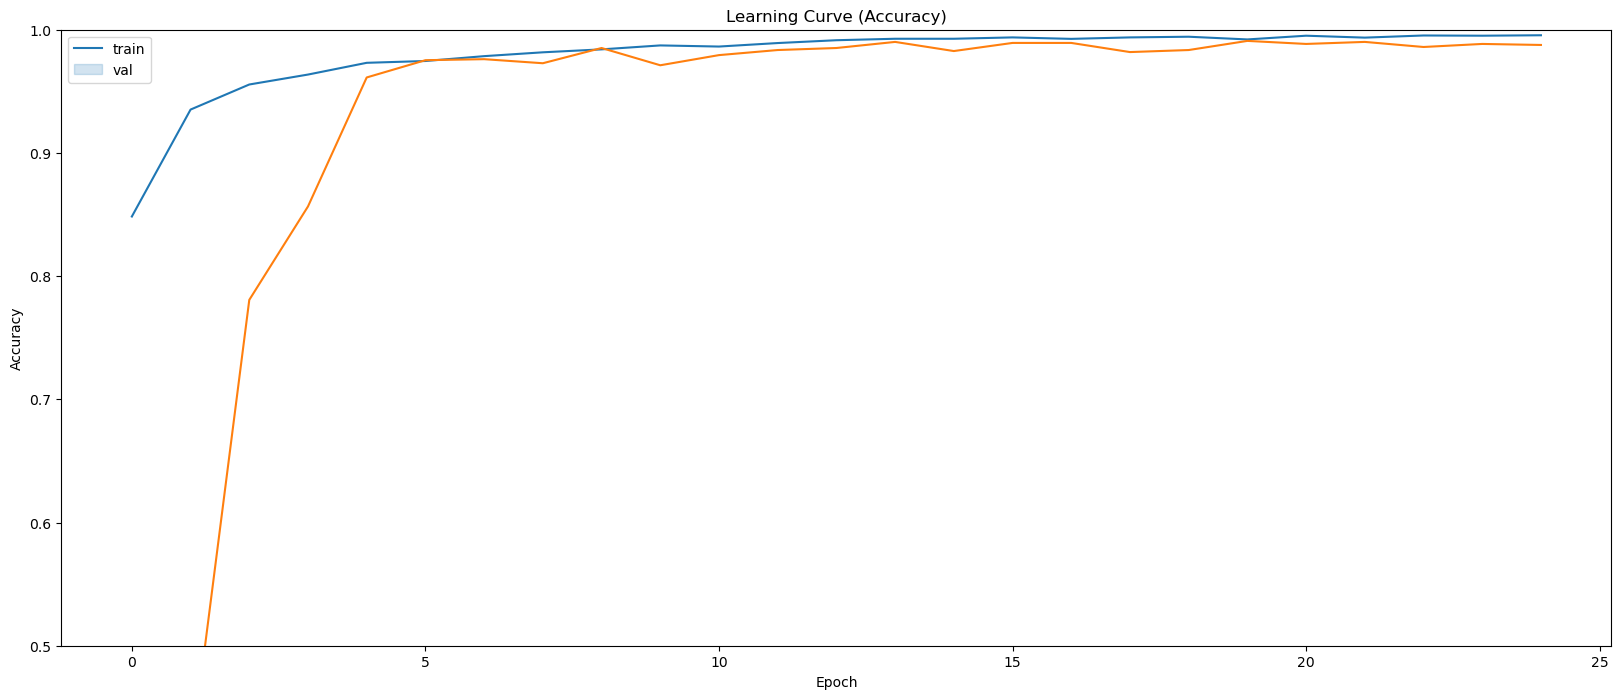

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.50, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

Saliency maps highlight the regions in an image that are most influential for the model’s prediction. Brighter areas in these maps indicate parts of the image where changes would most affect the model's output.

For Classification Tasks: If the model correctly classifies an image, the saliency map should highlight the features that are characteristic of the class. For example, in a model trained to identify animals, the saliency map for a 'dog' image should highlight areas showing the dog, especially distinguishing features like ears or nose.


In [62]:
base_model

In [63]:
# Define a list of indices for the layers you want to retrieve
layer_indices = [0, 9, 19, 29, 39, -1]  # -1 represents the last layer

# Retrieve the layers using the specified indices
selected_layers = [base_model.layers[i] for i in layer_indices]

# Display the names of the selected layers
for layer in selected_layers:
    print(layer.name)

input_2
conv2_block1_1_relu
conv2_block2_1_conv
conv2_block3_1_conv
conv3_block1_1_conv
conv5_block3_out


1/1 [==============================] - 0s 23ms/step


/tmp/ipykernel_92/3048496606.py:85: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


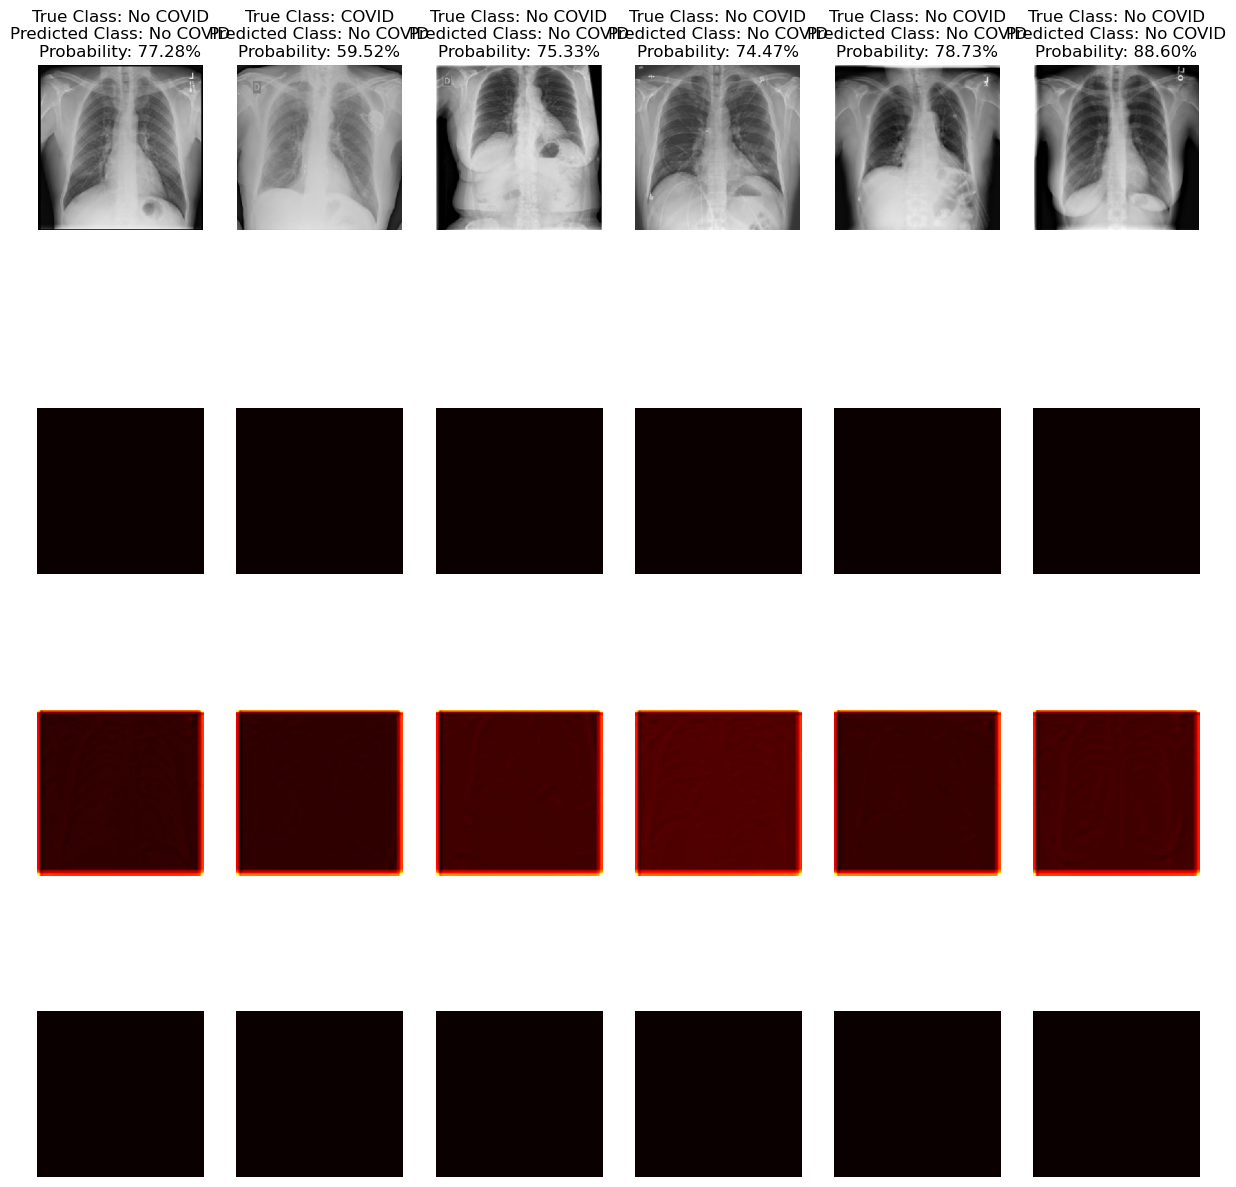

In [106]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model


class_labels = train_data.replace(['Viral Pneumonia', 'Normal'], 'No COVID').iloc[:, 0].tolist()  # Class labels
img_paths = train_data.iloc[:, 1].tolist()  # Adjust the column index if needed
# selected_img_paths = random.sample(img_paths, 6)  # Randomly pick 4 images
selected_indices = random.sample(range(len(img_paths)), 6)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_classes = [class_labels[i] for i in selected_indices]

# Function to preprocess your image (modify as per your model's requirement)
def preprocess_image(img_path, IMG_SIZE=IMG_SIZE):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.  # Normalization (adjust if your preprocessing is different)
    return img

# Function to generate saliency map for a specific layer
def get_saliency_map(model, image, layer_name):
    # Creating a model that will return the output of the specified layer as well as the final model output
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])

    # Using GradientTape for automatic differentiation.
    # This will record operations for computing gradients with respect to the inputs (image).
    with tf.GradientTape() as tape:
        # Running forward pass. Watching the input image for gradient calculation.
        conv_outputs, predictions = grad_model(image)

        # Using the class with the highest probability as our target class.
        # Alternatively, you can modify this to focus on a specific class.
        loss = tf.reduce_max(predictions)

    # Computing the gradients of our target (loss) with respect to the output of the specified layer
    grads = tape.gradient(loss, conv_outputs)

    # Global average pooling of the gradients to get a vector
    # This gives the importance of each feature map in the convolutional layer.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Accessing the output of the specified layer for our input image
    conv_outputs = conv_outputs[0]

    # Weighing the output feature maps by the pooled gradients
    # This step highlights the feature maps that are most influential for the target class.
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalizing the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# List of layer names for which you want to visualize the saliency maps
layer_names = ["conv2_block2_1_conv", "conv2_block3_1_conv", "conv5_block2_2_conv"]  # Replace with your actual layer names

# Visualizing the saliency maps for the selected images and layers
plt.figure(figsize=(15, 15))
for i, (img_path, img_class) in enumerate(zip(selected_img_paths, selected_classes)):
    img = preprocess_image(img_path)
    
    # Predicting the class of the image using the model
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class_probability = predictions[0][predicted_class_index]
    predicted_class = class_labels[predicted_class_index]
    
    # Displaying the class and original image
    plt.subplot(6, len(selected_img_paths), i + 1)
    plt.title(f"True Class: {class_labels[i]}\nPredicted Class: {predicted_class}\nProbability: {predicted_class_probability:.2%}")
    # plt.title(f"Class: {img_class}")
    plt.imshow(load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE)))
    plt.axis('off')

    # Displaying saliency maps for each layer
    for j, layer_name in enumerate(layer_names):
        saliency_map = get_saliency_map(base_model, img, layer_name)
        plt.subplot(4, len(selected_img_paths), len(selected_img_paths) * (j + 1) + i + 1)
        plt.imshow(saliency_map, cmap='hot')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [105]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the predicted labels from your model
y_pred = model.predict(ds_test)

# Transform the predicted labels into classes (class indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the data generator
y_true = ds_test.classes

# Get the class names from the data generator
class_names = list(ds_test.class_indices.keys())

# Calculate the overall accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion)

# Calculate per-class accuracy
class_accuracy = confusion.diagonal() / confusion.sum(axis=1)
print("Accuracy per class:")
for i, acc in enumerate(class_accuracy):
    print(f"Class {class_names[i]}: {acc:.2f}")

# Calculate the classification report (including per-class F1-score)
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


3031/3031 [==============================] - 23s 7ms/step
Accuracy: 0.23853513691850875
Confusion Matrix:
[[ 723    0]
 [2308    0]]
Accuracy per class:
Class COVID: 1.00
Class No COVID: 0.00
Classification Report:
              precision    recall  f1-score   support

       COVID       0.24      1.00      0.39       723
    No COVID       0.00      0.00      0.00      2308

    accuracy                           0.24      3031
   macro avg       0.12      0.50      0.19      3031
weighted avg       0.06      0.24      0.09      3031



/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## 4.2 Model 2: ResNet Pre-trained on ImageNet (freeze)

In [76]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224  # Image size (150x150 pixels in this example)
BATCH = 32      # Batch size for processing in batches
SEED = 42       # Seed for reproducibility of results

# ImageDataGenerator for Training Data
# Includes data augmentation to improve model generalization
train_datagen = ImageDataGenerator(
    rescale=1/255.,          # Normalizing pixels (0-1 range)
    zoom_range=0.15,          # Random zoom up to 15%
    width_shift_range=0.15,   # Horizontal shift up to 15%
    height_shift_range=0.15,  # Vertical shift up to 15%
)

# ImageDataGenerator for Validation and Test Data
# Only normalization is applied here
val_datagen = ImageDataGenerator(rescale=1/255.) #specify the images are 1 channel)


# Flow from DataFrame for Training Data
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=BATCH,                  # Number of images to process at a time
    seed=SEED                           # Seed for random transformations
)

# Flow from DataFrame for Validation Data
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=BATCH,
    seed=SEED
)

# Flow from DataFrame for Test Data
ds_test = val_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=1,                      # Processing one image at a time
    shuffle=False                      # Keeping the order of images
)


Found 10909 validated image filenames belonging to 3 classes.
Found 1213 validated image filenames belonging to 3 classes.
Found 3031 validated image filenames belonging to 3 classes.


ResNet50 Architecture (50 layers)


![ResNet](https://upload.wikimedia.org/wikipedia/commons/9/98/ResNet50.png)

In [77]:
# Setting callbacks

# EarlyStopping: Monitor validation loss and stop training if it doesn't improve for a certain number of epochs.
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement before stopping
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    restore_best_weights=True,  # Restore model weights to the best epoch
)

# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus.
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    cooldown=0,  # Number of epochs to wait before resuming normal operation after lr has been reduced
    verbose=1,  # Verbosity mode (1 for updates, 0 for silent)
)


In [78]:
# Define a function to create a Keras model for image classification.
from tensorflow.keras.applications import ResNet50

#NB: make your model work with grayscale images. You just need to make the image to appear to be RGB. 
# The easiest way to do so is to repeat the image array 3 times on a new dimension. 
# Because you will have the same image over all 3 channels, the performance of the model should be the same
# as it was on RGB images.

# Load the pre-trained ResNet50 model, pretrained on 'imagenet'
# Set the input shape to (IMG_SIZE, IMG_SIZE, 1) and exclude the top layer
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),  # Specify the input shape (width, height, color channels)
    include_top=False
)

# Set the base model to be non-trainable (freeze its weights)
base_model.trainable = False

def get_pretrained():
    # Define the input layer with the desired shape
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))  # Input shape: (width, height, color channels)

    # Pass the input through the pre-trained base model
    x = base_model(inputs)
    
    # Head
    
    # x = layers.GlobalAveragePooling2D()(x) # Global Average Pooling Layer
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x) # Fully connected layer with 128 units and ReLU activation
    x = layers.Dropout(0.2)(x) # Dropout layer with a dropout rate of 0.1 to prevent overfitting
    output = layers.Dense(3, activation='softmax')(x) # Final output layer with 3 unit and softmax activation for multi classification

    # Create the final model with specified input and output
    model = keras.Model(inputs=[inputs], outputs=output)

    return model


In [79]:
keras.backend.clear_session()

model = get_pretrained()
model.compile(loss='categorical_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 30,010,499
Trainable params: 6,422,787
Non-trai

In [ ]:
# train
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_data)/BATCH),
          validation_steps=(len(val_data)/BATCH));


In [12]:
!pip install -q seaborn

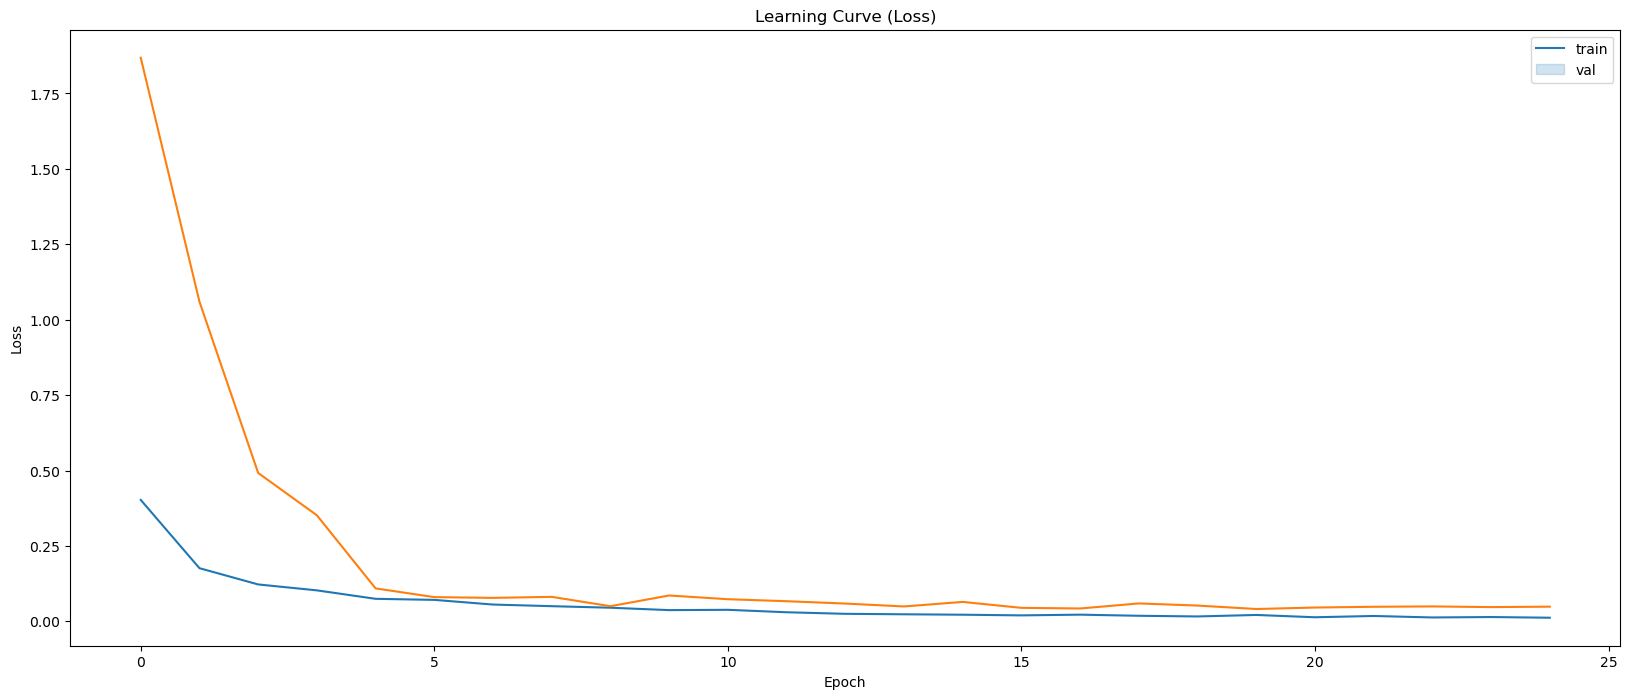

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
# ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

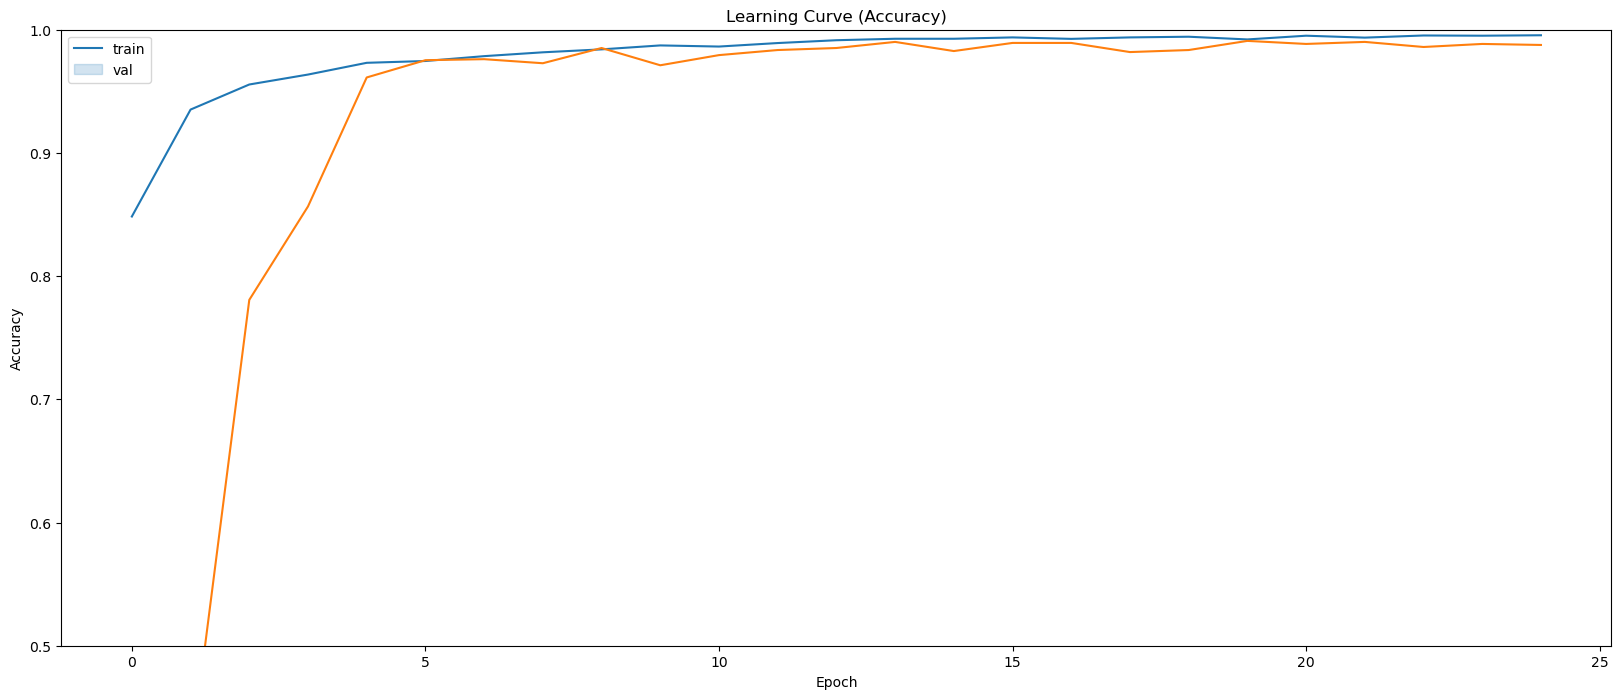

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.50, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

Saliency maps highlight the regions in an image that are most influential for the model’s prediction. Brighter areas in these maps indicate parts of the image where changes would most affect the model's output.

For Classification Tasks: If the model correctly classifies an image, the saliency map should highlight the features that are characteristic of the class. For example, in a model trained to identify animals, the saliency map for a 'dog' image should highlight areas showing the dog, especially distinguishing features like ears or nose.


1/1 [==============================] - 0s 20ms/step


/tmp/ipykernel_92/1330735493.py:85: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


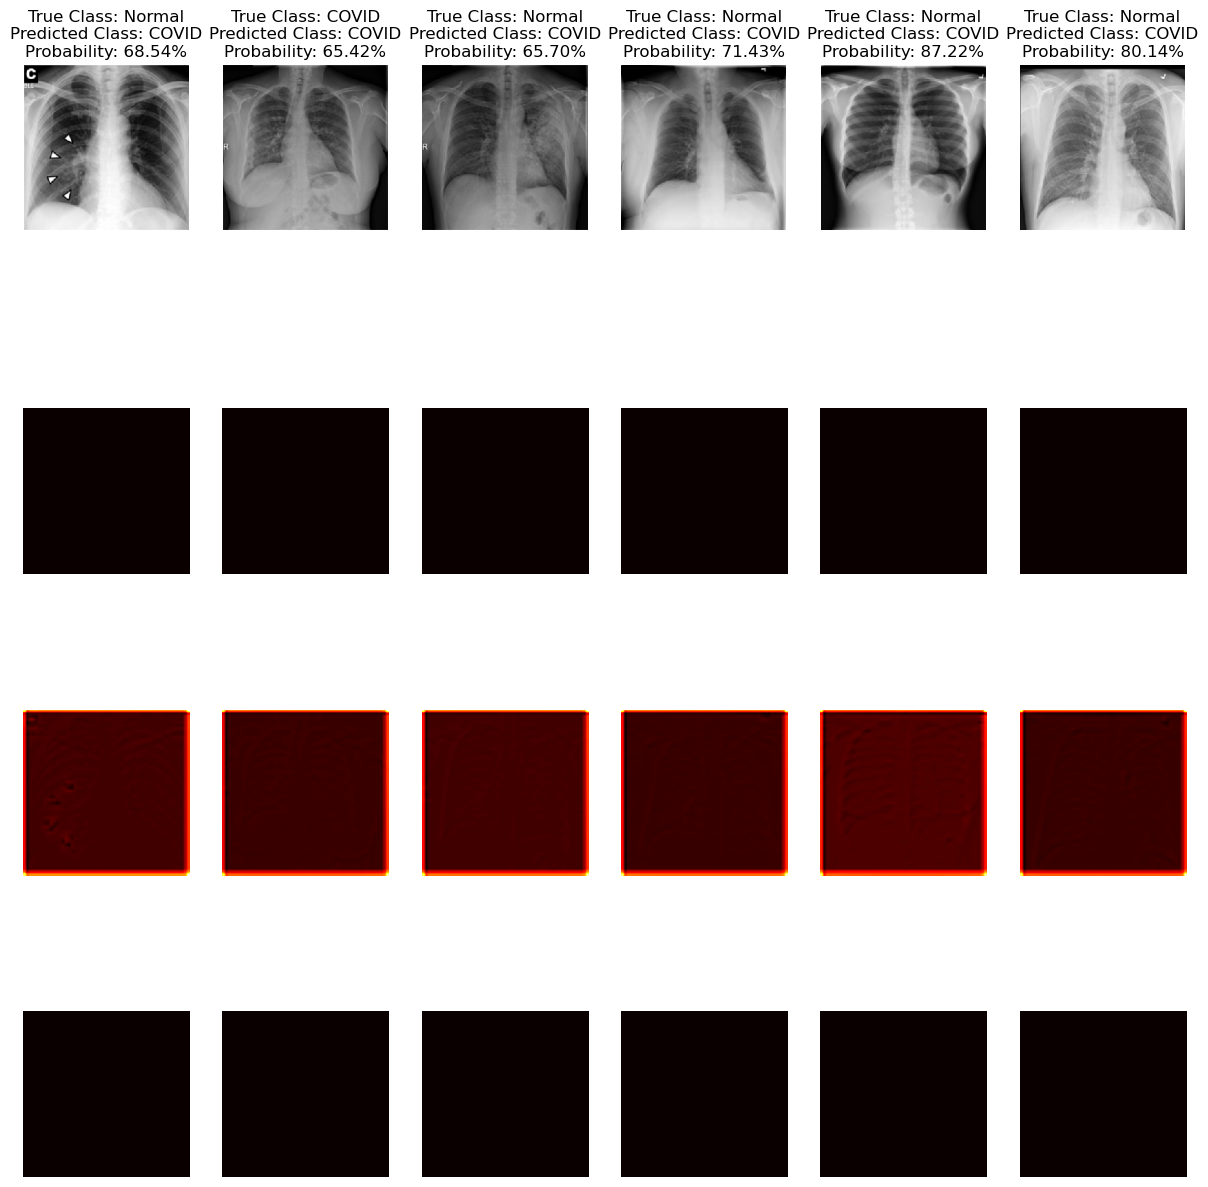

In [81]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model


class_labels = train_data.iloc[:, 0].tolist()  # Class labels
img_paths = train_data.iloc[:, 1].tolist()  # Adjust the column index if needed
# selected_img_paths = random.sample(img_paths, 6)  # Randomly pick 4 images
selected_indices = random.sample(range(len(img_paths)), 6)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_classes = [class_labels[i] for i in selected_indices]

# Function to preprocess your image (modify as per your model's requirement)
def preprocess_image(img_path, IMG_SIZE=IMG_SIZE):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.  # Normalization (adjust if your preprocessing is different)
    return img

# Function to generate saliency map for a specific layer
def get_saliency_map(model, image, layer_name):
    # Creating a model that will return the output of the specified layer as well as the final model output
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])

    # Using GradientTape for automatic differentiation.
    # This will record operations for computing gradients with respect to the inputs (image).
    with tf.GradientTape() as tape:
        # Running forward pass. Watching the input image for gradient calculation.
        conv_outputs, predictions = grad_model(image)

        # Using the class with the highest probability as our target class.
        # Alternatively, you can modify this to focus on a specific class.
        loss = tf.reduce_max(predictions)

    # Computing the gradients of our target (loss) with respect to the output of the specified layer
    grads = tape.gradient(loss, conv_outputs)

    # Global average pooling of the gradients to get a vector
    # This gives the importance of each feature map in the convolutional layer.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Accessing the output of the specified layer for our input image
    conv_outputs = conv_outputs[0]

    # Weighing the output feature maps by the pooled gradients
    # This step highlights the feature maps that are most influential for the target class.
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalizing the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# List of layer names for which you want to visualize the saliency maps
layer_names = ["conv2_block2_1_conv", "conv2_block3_1_conv", "conv5_block2_2_conv"]  # Replace with your actual layer names

# Visualizing the saliency maps for the selected images and layers
plt.figure(figsize=(15, 15))
for i, (img_path, img_class) in enumerate(zip(selected_img_paths, selected_classes)):
    img = preprocess_image(img_path)
    
    # Predicting the class of the image using the model
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class_probability = predictions[0][predicted_class_index]
    predicted_class = class_labels[predicted_class_index]
    
    # Displaying the class and original image
    plt.subplot(6, len(selected_img_paths), i + 1)
    plt.title(f"True Class: {class_labels[i]}\nPredicted Class: {predicted_class}\nProbability: {predicted_class_probability:.2%}")
    # plt.title(f"Class: {img_class}")
    plt.imshow(load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE)))
    plt.axis('off')

    # Displaying saliency maps for each layer
    for j, layer_name in enumerate(layer_names):
        saliency_map = get_saliency_map(base_model, img, layer_name)
        plt.subplot(4, len(selected_img_paths), len(selected_img_paths) * (j + 1) + i + 1)
        plt.imshow(saliency_map, cmap='hot')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [82]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the predicted labels from your model
y_pred = model.predict(ds_test)

# Transform the predicted labels into classes (class indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the data generator
y_true = ds_test.classes

# Get the class names from the data generator
class_names = list(ds_test.class_indices.keys())

# Calculate the overall accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion)

# Calculate per-class accuracy
class_accuracy = confusion.diagonal() / confusion.sum(axis=1)
print("Accuracy per class:")
for i, acc in enumerate(class_accuracy):
    print(f"Class {class_names[i]}: {acc:.2f}")

# Calculate the classification report (including per-class F1-score)
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


3031/3031 [==============================] - 23s 7ms/step
Accuracy: 0.6727152754866381
Confusion Matrix:
[[   0  723    0]
 [   0 2039    0]
 [   0  269    0]]
Accuracy per class:
Class COVID: 0.00
Class Normal: 1.00
Class Viral Pneumonia: 0.00
Classification Report:
                 precision    recall  f1-score   support

          COVID       0.00      0.00      0.00       723
         Normal       0.67      1.00      0.80      2039
Viral Pneumonia       0.00      0.00      0.00       269

       accuracy                           0.67      3031
      macro avg       0.22      0.33      0.27      3031
   weighted avg       0.45      0.67      0.54      3031



/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## 4.3 Model 3: XCeption Pre-trained on ImageNet 

In [71]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224  # Image size (150x150 pixels in this example)
BATCH = 32      # Batch size for processing in batches
SEED = 42       # Seed for reproducibility of results

# ImageDataGenerator for Training Data
# Includes data augmentation to improve model generalization
train_datagen = ImageDataGenerator(
    rescale=1/255.,          # Normalizing pixels (0-1 range)
    zoom_range=0.15,          # Random zoom up to 15%
    width_shift_range=0.15,   # Horizontal shift up to 15%
    height_shift_range=0.15,  # Vertical shift up to 15%
)

# ImageDataGenerator for Validation and Test Data
# Only normalization is applied here
val_datagen = ImageDataGenerator(rescale=1/255.) #specify the images are 1 channel)


# Flow from DataFrame for Training Data
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=BATCH,                  # Number of images to process at a time
    seed=SEED                           # Seed for random transformations
)

# Flow from DataFrame for Validation Data
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=BATCH,
    seed=SEED
)

# Flow from DataFrame for Test Data
ds_test = val_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resizing images to the specified size
    class_mode='categorical',  # 'categorical' for multi-class dataset
    batch_size=1,                      # Processing one image at a time
    shuffle=False                      # Keeping the order of images
)


Found 10909 validated image filenames belonging to 3 classes.
Found 1213 validated image filenames belonging to 3 classes.
Found 3031 validated image filenames belonging to 3 classes.


ResNet50 Architecture (50 layers)


![ResNet](https://upload.wikimedia.org/wikipedia/commons/9/98/ResNet50.png)

In [72]:
# Setting callbacks

# EarlyStopping: Monitor validation loss and stop training if it doesn't improve for a certain number of epochs.
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement before stopping
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    restore_best_weights=True,  # Restore model weights to the best epoch
)

# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus.
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,  # Minimum change in validation loss to be considered an improvement
    cooldown=0,  # Number of epochs to wait before resuming normal operation after lr has been reduced
    verbose=1,  # Verbosity mode (1 for updates, 0 for silent)
)


In [73]:
# Define a function to create a Keras model for image classification.
from tensorflow.keras.applications import Xception

#NB: make your model work with grayscale images. You just need to make the image to appear to be RGB. 
# The easiest way to do so is to repeat the image array 3 times on a new dimension. 
# Because you will have the same image over all 3 channels, the performance of the model should be the same
# as it was on RGB images.

# Load the pre-trained ResNet50 model, pretrained on 'imagenet'
# Set the input shape to (IMG_SIZE, IMG_SIZE, 1) and exclude the top layer
base_model = Xception(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),  # Specify the input shape (width, height, color channels)
    include_top=False
)

# Set the base model to be non-trainable (freeze its weights)
base_model.trainable = True

def get_pretrained():
    # Define the input layer with the desired shape
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))  # Input shape: (width, height, color channels)

    # Pass the input through the pre-trained base model
    x = base_model(inputs)
    
    # Head
    
    # x = layers.GlobalAveragePooling2D()(x) # Global Average Pooling Layer
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x) # Fully connected layer with 128 units and ReLU activation
    x = layers.Dropout(0.2)(x) # Dropout layer with a dropout rate of 0.1 to prevent overfitting
    output = layers.Dense(3, activation='softmax')(x) # Final output layer with 3 unit and softmax activation for multi classification

    # Create the final model with specified input and output
    model = keras.Model(inputs=[inputs], outputs=output)

    return model


In [74]:
keras.backend.clear_session()

model = get_pretrained()
model.compile(loss='categorical_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics='accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 27,284,267
Trainable params: 27,229,739
Non-tra

In [ ]:
# train
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_data)/BATCH),
          validation_steps=(len(val_data)/BATCH));


In [12]:
!pip install -q seaborn

NameError: name 'history' is not defined

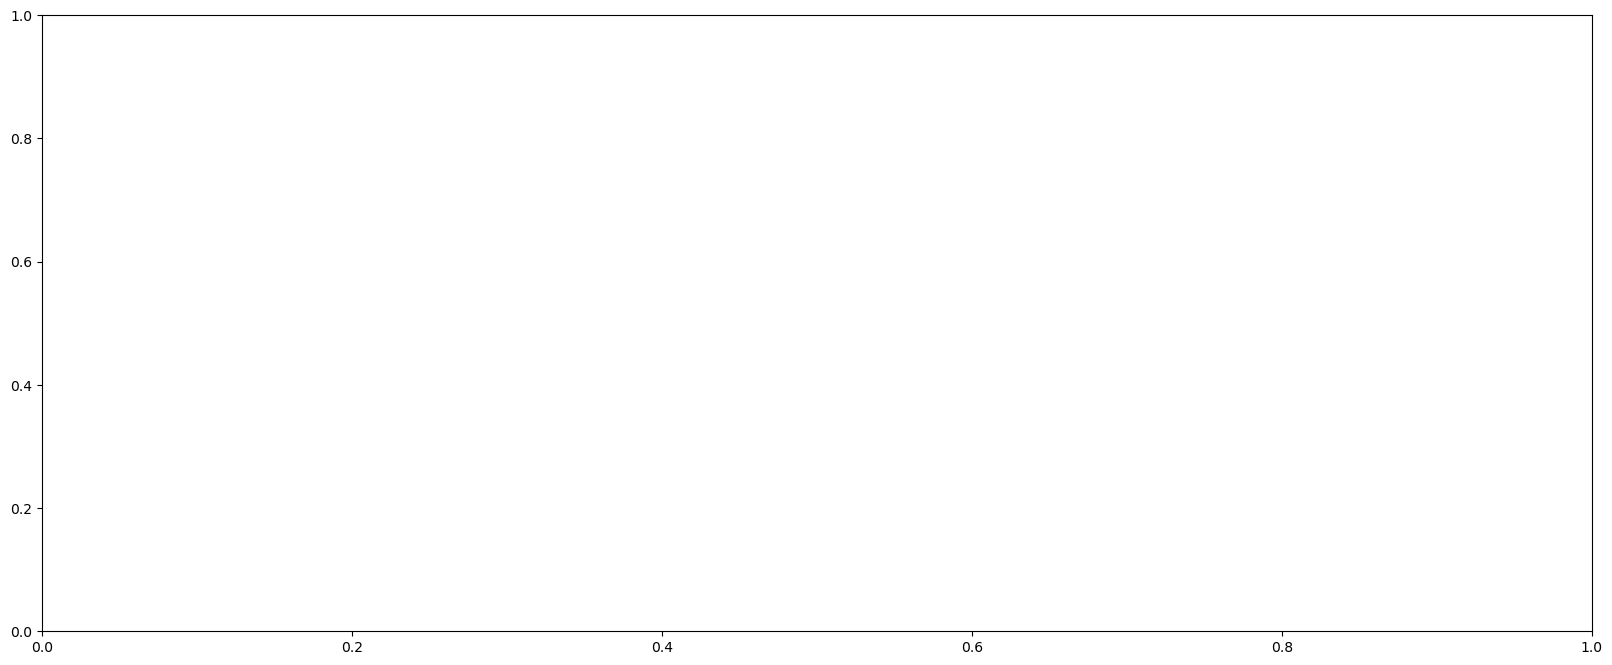

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

Saliency maps highlight the regions in an image that are most influential for the model’s prediction. Brighter areas in these maps indicate parts of the image where changes would most affect the model's output.

For Classification Tasks: If the model correctly classifies an image, the saliency map should highlight the features that are characteristic of the class. For example, in a model trained to identify animals, the saliency map for a 'dog' image should highlight areas showing the dog, especially distinguishing features like ears or nose.


/tmp/ipykernel_90/2290270644.py:81: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


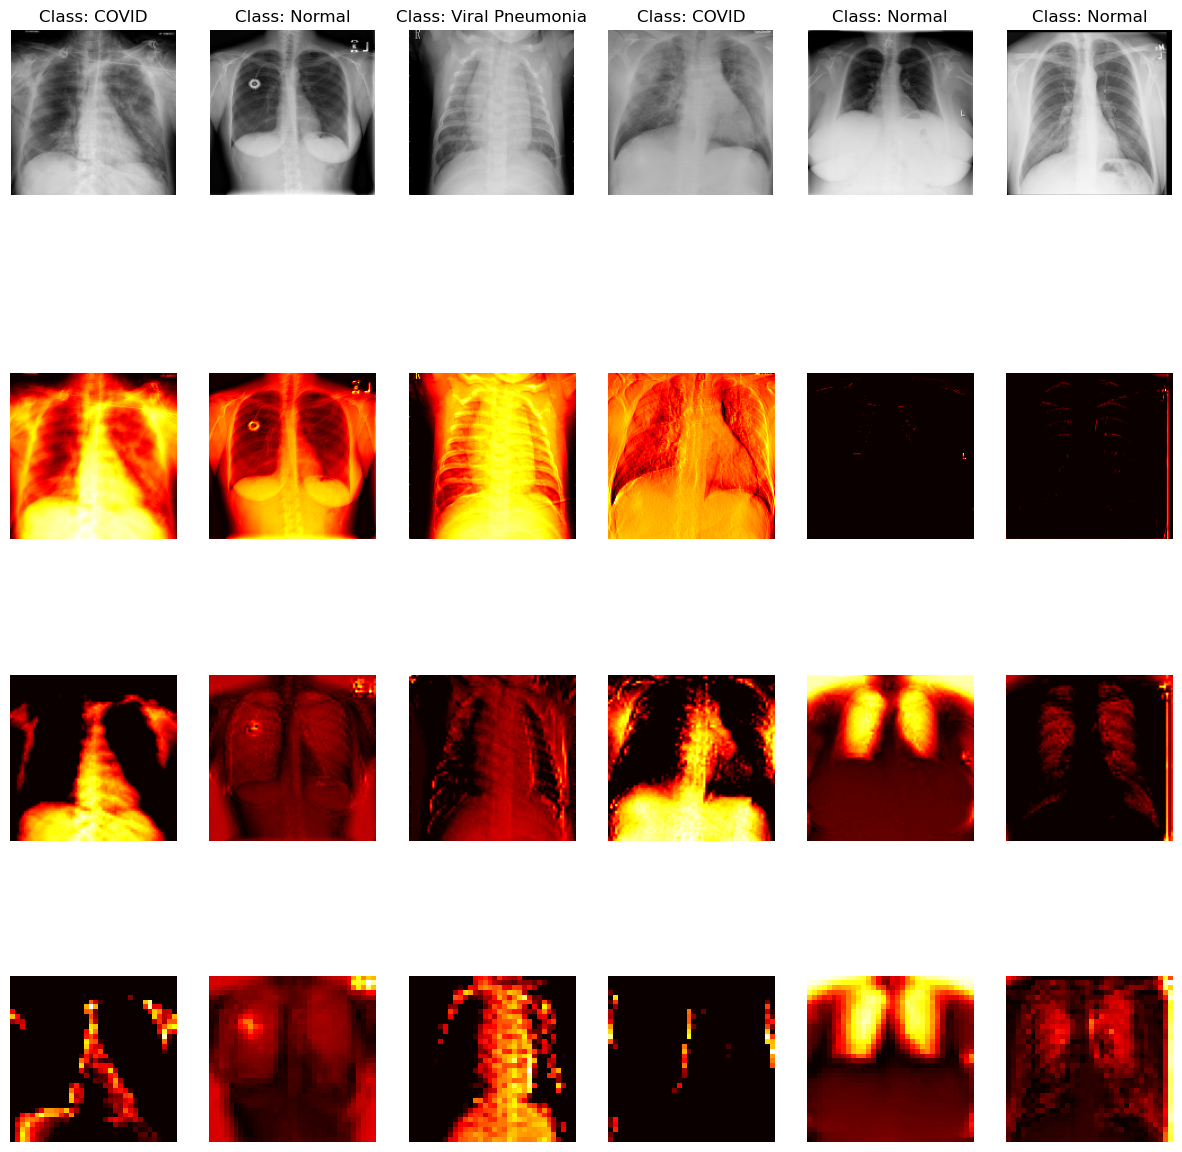

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

# Load your pre-trained model
# model = get_model()

# Assuming your train_data DataFrame's second column contains image paths
class_labels = train_data.iloc[:, 0].tolist()  # Class labels
img_paths = train_data.iloc[:, 1].tolist()  # Adjust the column index if needed
# selected_img_paths = random.sample(img_paths, 6)  # Randomly pick 4 images
selected_indices = random.sample(range(len(img_paths)), 6)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_classes = [class_labels[i] for i in selected_indices]

# Function to preprocess your image (modify as per your model's requirement)
def preprocess_image(img_path, IMG_SIZE=150):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.  # Normalization (adjust if your preprocessing is different)
    return img

# Function to generate saliency map for a specific layer
def get_saliency_map(model, image, layer_name):
    # Creating a model that will return the output of the specified layer as well as the final model output
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])

    # Using GradientTape for automatic differentiation.
    # This will record operations for computing gradients with respect to the inputs (image).
    with tf.GradientTape() as tape:
        # Running forward pass. Watching the input image for gradient calculation.
        conv_outputs, predictions = grad_model(image)

        # Using the class with the highest probability as our target class.
        # Alternatively, you can modify this to focus on a specific class.
        loss = tf.reduce_max(predictions)

    # Computing the gradients of our target (loss) with respect to the output of the specified layer
    grads = tape.gradient(loss, conv_outputs)

    # Global average pooling of the gradients to get a vector
    # This gives the importance of each feature map in the convolutional layer.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Accessing the output of the specified layer for our input image
    conv_outputs = conv_outputs[0]

    # Weighing the output feature maps by the pooled gradients
    # This step highlights the feature maps that are most influential for the target class.
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalizing the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# List of layer names for which you want to visualize the saliency maps
layer_names = ["conv2d", "conv2d_1", "conv2d_2"]  # Replace with your actual layer names

# Visualizing the saliency maps for the selected images and layers
plt.figure(figsize=(15, 15))
for i, (img_path, img_class) in enumerate(zip(selected_img_paths, selected_classes)):
    img = preprocess_image(img_path)

    # Displaying the class and original image
    plt.subplot(6, len(selected_img_paths), i + 1)
    plt.title(f"Class: {img_class}")
    plt.imshow(load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE)))
    plt.axis('off')

    # Displaying saliency maps for each layer
    for j, layer_name in enumerate(layer_names):
        saliency_map = get_saliency_map(model, img, layer_name)
        plt.subplot(4, len(selected_img_paths), len(selected_img_paths) * (j + 1) + i + 1)
        plt.imshow(saliency_map, cmap='hot')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [27]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your test dataset using the data generator
# test_generator = datagen.flow_from_dataframe(
#     dataframe=ds_test,  # Use your ds_test DataFrame here
#     x_col='image_path',  # Column containing image paths
#     y_col='class',       # Column containing class labels
#     target_size=(image_width, image_height),  # Image size
#     batch_size=batch_size,  # Batch size
#     shuffle=False,  # Do not shuffle the dataset
#     class_mode='categorical'  # Class mode for multi-class classification problems
# )

# Get the predicted labels from your model
y_pred = model.predict(ds_test)

# Transform the predicted labels into classes (class indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the data generator
y_true = ds_test.classes

# Get the class names from the data generator
class_names = list(ds_test.class_indices.keys())

# Calculate the overall accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion)

# Calculate per-class accuracy
class_accuracy = confusion.diagonal() / confusion.sum(axis=1)
print("Accuracy per class:")
for i, acc in enumerate(class_accuracy):
    print(f"Class {class_names[i]}: {acc:.2f}")

# Calculate the classification report (including per-class F1-score)
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


Accuracy: 0.7990762124711316
Confusion Matrix:
[[ 506  189   28]
 [ 241 1672  126]
 [  14   11  244]]
Accuracy per class:
Class COVID: 0.70
Class Normal: 0.82
Class Viral Pneumonia: 0.91
Classification Report:
                 precision    recall  f1-score   support

          COVID       0.66      0.70      0.68       723
         Normal       0.89      0.82      0.86      2039
Viral Pneumonia       0.61      0.91      0.73       269

       accuracy                           0.80      3031
      macro avg       0.72      0.81      0.76      3031
   weighted avg       0.81      0.80      0.80      3031

